# Least square problem for polynomial regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load point data 

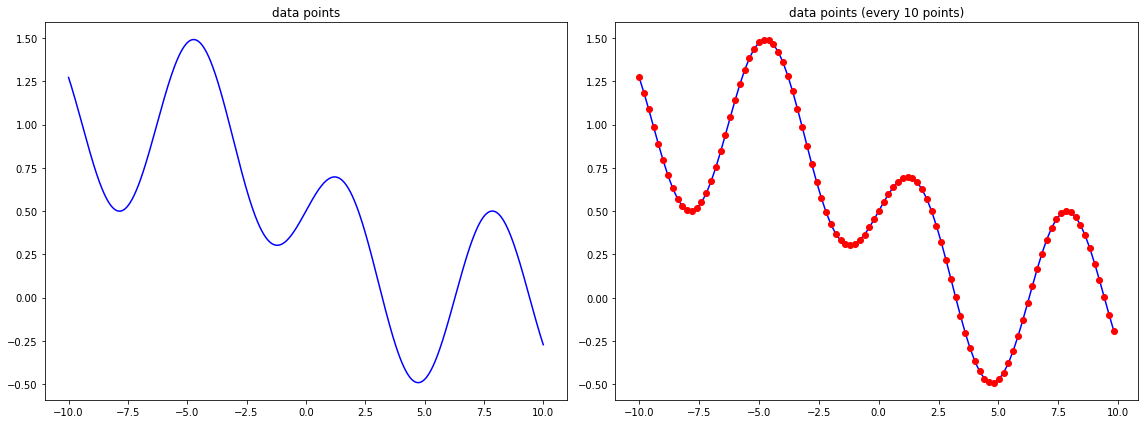

In [2]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x   = data[0, :data.shape[1]]    # independent variable
y   = data[1, :data.shape[1]]    # dependent variable

x2  = x[::10]       
y2  = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x2, y2, '-', color = 'blue')
plt.plot(x2, y2, 'o', color = 'red')
plt.title('data points (every 10 points)')

plt.tight_layout()
plt.show()

In [3]:
#
# A : [ x_1^0, x_1^1, ... , x_1^{p-1} ; x_2^0, x_2^1, ... , x_2^{p-1} ; ... ; x_n^0, x_n^1, ... , x_n^{p-1}]
#
def construct_matrix_A(x, p):

    # use functions including : np.power
    n = x.shape[0]
    A = np.zeros((n,p))
    
    for i in range(0,n):
        for j in range(0,p):
            A[i][j] = np.power(x[i],j)    

    return A

#
# x : independent variable
# y : dependent variable
# p : power of the polinomial (theta_0 * x^0, theta_1 * x^1, ..., theta_{p-1} * x^{p-1})
# alpha : coefficient for the regularization term : \| theta \|_2^2
#
def solve_polynomial_regression(x, y, p, alpha = 0):
    
    # use functions including : np.identity, np.matmul, np.linalg.inv
    A = construct_matrix_A(x,p)
    #t = np.linalg.solve(np.matmul(A.T, A), A.T@y)
    t = np.linalg.inv(np.matmul(A.T, A)+alpha*np.identity(p))@A.T@y
    h = A@t
    return h

h_01        = solve_polynomial_regression(x, y, 1)
h_02        = solve_polynomial_regression(x, y, 2)
h_04        = solve_polynomial_regression(x, y, 4)
h_08        = solve_polynomial_regression(x, y, 8)
h_16        = solve_polynomial_regression(x, y, 16)
h_32        = solve_polynomial_regression(x, y, 32)

h_24_0      = solve_polynomial_regression(x, y, 24, 0)
h_24_00001  = solve_polynomial_regression(x, y, 24, 0.0001)
h_24_0001   = solve_polynomial_regression(x, y, 24, 0.001)
h_24_001    = solve_polynomial_regression(x, y, 24, 0.01)
h_24_01     = solve_polynomial_regression(x, y, 24, 0.1)
h_24_1      = solve_polynomial_regression(x, y, 24, 1)


In [4]:
def plot_polynomial_regression_3x2(x, y, h_01, title_01, h_02, title_02, h_04, title_04, h_08, title_08, h_16, title_16, h_32, title_32):

    plt.figure(figsize=(16,18))

    plt.subplot(321)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_01, '-', color='red')
    plt.title(title_01)

    plt.subplot(322)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_02, '-', color='red')
    plt.title(title_02)

    plt.subplot(323)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_04, '-', color='red')
    plt.title(title_04)

    plt.subplot(324)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_08, '-', color='red')
    plt.title(title_08)

    plt.subplot(325)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_16, '-', color='red')
    plt.title(title_16)

    plt.subplot(326)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_32, '-', color='red')
    plt.title(title_32)

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue and the polynomial approximations with varying degrees in red ($p = 1, 2, 4, 8, 16, 32$)

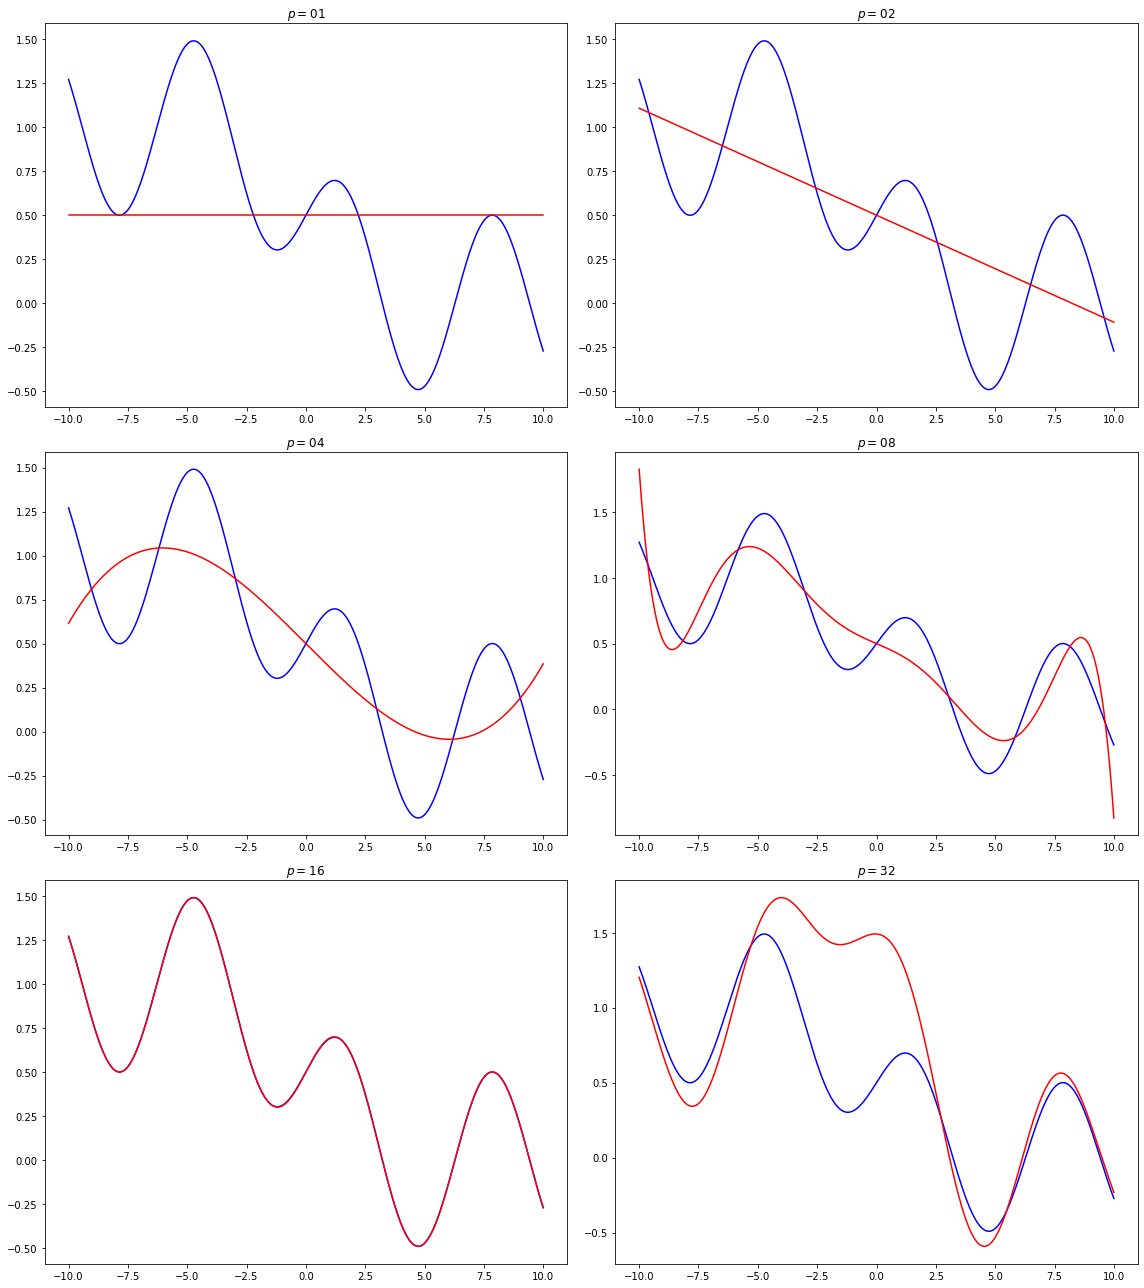

In [5]:
plot_polynomial_regression_3x2(x, y, h_01, '$p = 01$', h_02, '$p = 02$', h_04, '$p = 04$', h_08, '$p = 08$', h_16, '$p = 16$', h_32, '$p = 32$')

### # 02. plot the input data in blue and the polynomial approximations with varying regularization parameters at $p = 24$ ($\alpha = 0, 0.0001, 0.001, 0.01, 0.1, 1$)

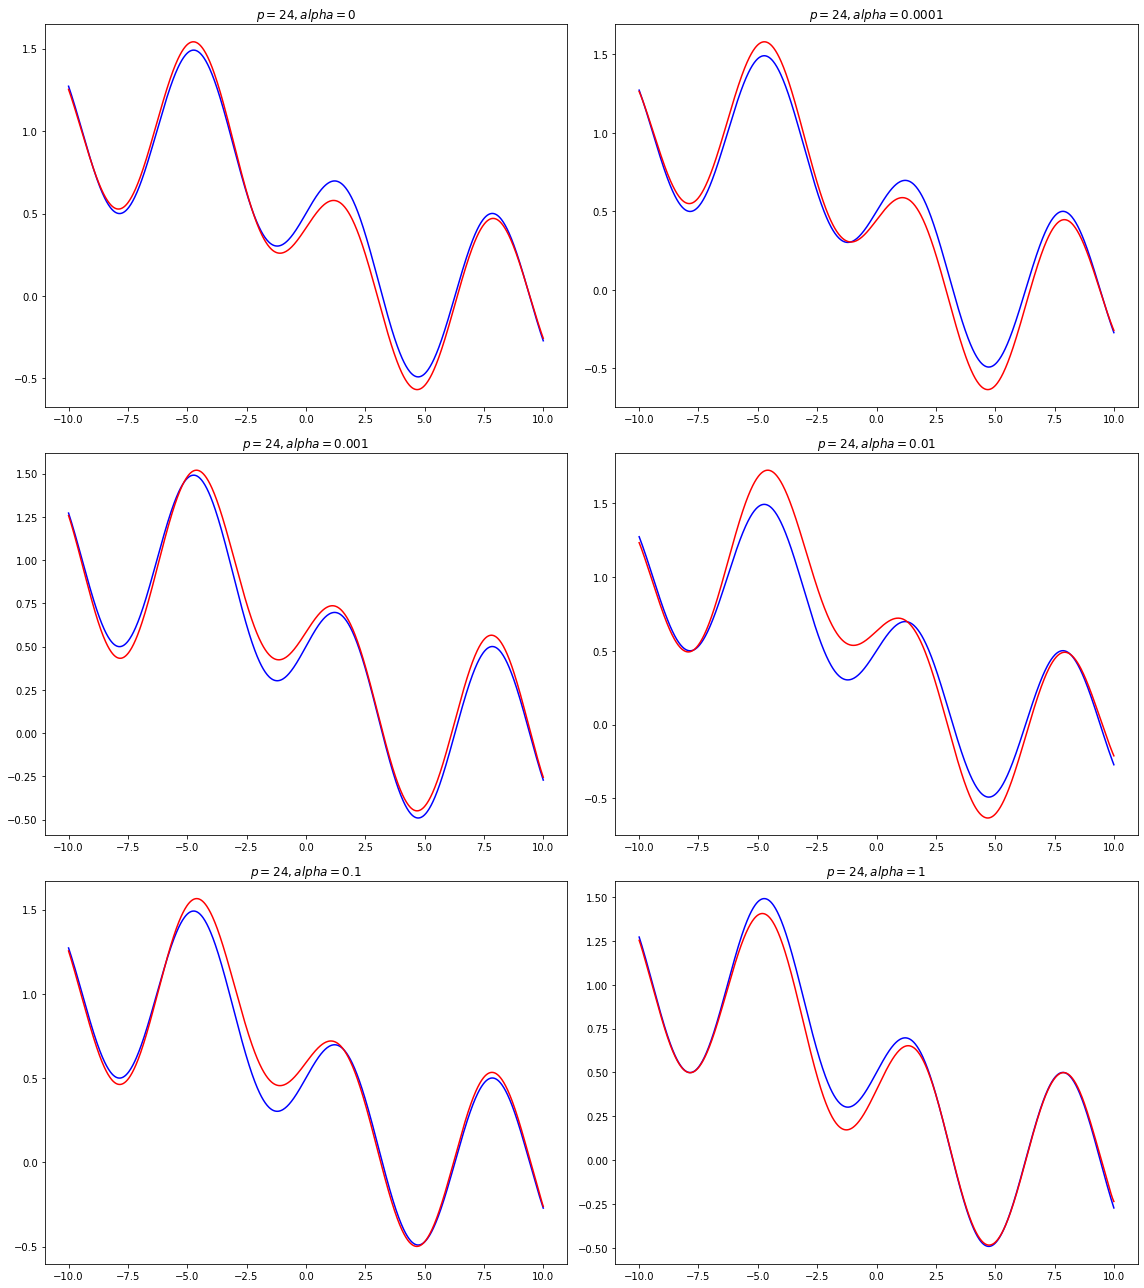

In [6]:
plot_polynomial_regression_3x2(x, y, h_24_0, '$p = 24, alpha = 0$', h_24_00001, '$p = 24, alpha = 0.0001$', h_24_0001, '$p = 24, alpha = 0.001$', h_24_001, '$p = 24, alpha = 0.01$', h_24_01, '$p = 24, alpha = 0.1$', h_24_1, '$p = 24, alpha = 1$')